In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
import sklearn

books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
toread = pd.read_csv('to_read.csv')
tags = pd.read_csv('tags.csv')
book_tags = pd.read_csv('book_tags.csv')

In [2]:
# Checking the columns of each DataFrame
books_columns = books.columns.tolist()
ratings_columns = ratings.columns.tolist()
toread_columns = toread.columns.tolist()
tags_columns = tags.columns.tolist()
book_tags_columns = book_tags.columns.tolist()

# Displaying the columns for interpretation
books_columns, ratings_columns, toread_columns, tags_columns, book_tags_columns


(['book_id',
  'goodreads_book_id',
  'best_book_id',
  'work_id',
  'books_count',
  'isbn',
  'isbn13',
  'authors',
  'original_publication_year',
  'original_title',
  'title',
  'language_code',
  'average_rating',
  'ratings_count',
  'work_ratings_count',
  'work_text_reviews_count',
  'ratings_1',
  'ratings_2',
  'ratings_3',
  'ratings_4',
  'ratings_5',
  'image_url',
  'small_image_url'],
 ['user_id', 'book_id', 'rating'],
 ['user_id', 'book_id'],
 ['tag_id', 'tag_name'],
 ['goodreads_book_id', 'tag_id', 'count'])

In [3]:
books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [4]:
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [5]:
book_tags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


In [6]:
books['book_id'].nunique()


10000

In [7]:
books['goodreads_book_id'].nunique()


10000

In [8]:
# Remove duplicate ratings
initial_rating_count = ratings.shape[0]
ratings = ratings.drop_duplicates(subset=['user_id', 'book_id'])
final_rating_count = ratings.shape[0]

# Print the change after removing duplicate ratings
print(f"Removed {initial_rating_count - final_rating_count} duplicate ratings")

# Remove users who have rated fewer than 3 books
initial_user_count = ratings['user_id'].nunique()
ratings_count_per_user = ratings['user_id'].value_counts()
ratings = ratings[ratings['user_id'].isin(ratings_count_per_user[ratings_count_per_user >= 3].index)]
final_user_count = ratings['user_id'].nunique()

# Print the change after removing users with fewer than 3 ratings
print(f"Removed {initial_user_count - final_user_count} users with fewer than 3 ratings")


Removed 0 duplicate ratings
Removed 0 users with fewer than 3 ratings


In [9]:
# Drop duplicates based on the 'title'
books.drop_duplicates(subset='title', inplace=True)

# Directly drop rows where 'original_title' is NaN
books.dropna(subset=['original_title'], inplace=True)

# Find book_ids with any NaN values in the entire row (adjust columns as necessary)
nan_book_ids = books[books.isnull().any(axis=1)]['book_id']

# Filter out these IDs from the ratings DataFrame using isin and ~ for negation
ratings = ratings[~ratings['book_id'].isin(nan_book_ids)]

# Now check the shape of the books DataFrame
print(books.shape)

(9381, 23)


# **DATA ANALYSIS**

Number of Ratings per User

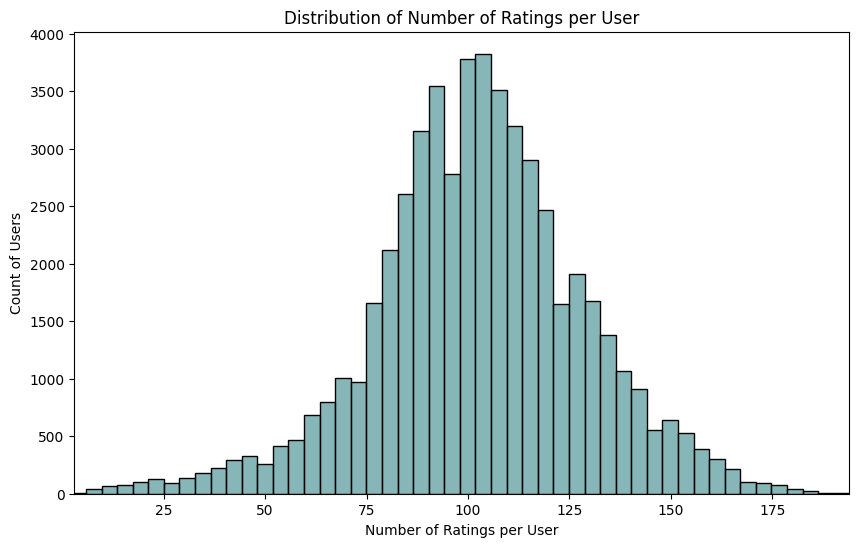

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of ratings per user
user_ratings_count = ratings['user_id'].value_counts().reset_index()
user_ratings_count.columns = ['user_id', 'number_of_ratings_per_user']

# Determine the maximum number of ratings a user has made
max_ratings = user_ratings_count['number_of_ratings_per_user'].max()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count['number_of_ratings_per_user'], bins=50, color="cadetblue", kde=False)
plt.xlim(3, max_ratings)  # Set the upper limit to the maximum number of ratings
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Count of Users')
plt.show()


We can see that are some users with many ratings. This is interesting, because we can later examine whether frequent raters rate books differently from less frequent raters. We will come back to this later. 

Distribution of Mean User Ratings

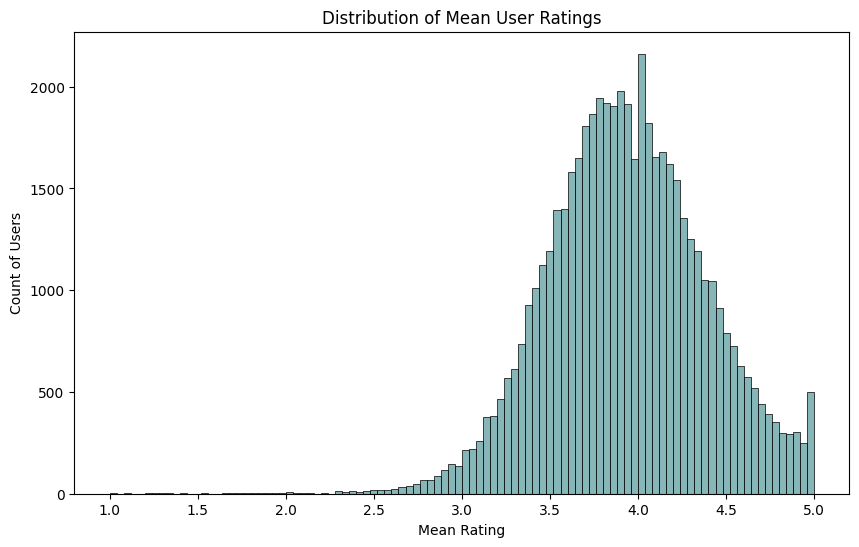

In [11]:
# Calculate mean ratings per user
mean_ratings_user = ratings.groupby('user_id')['rating'].mean().reset_index()
mean_ratings_user.columns = ['user_id', 'mean_user_rating']

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(mean_ratings_user['mean_user_rating'], bins=100, color="cadetblue", kde=False)
plt.title('Distribution of Mean User Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Count of Users')
plt.show()


People have different tendencies to rate books. Such tendencies can be seen in the figure below. On the right side there is a bump from users with a mean rating of 5, indicating that they really liked all books (or they only rated books they really like...). We can also see that there are nearly no notoriuous downvoters rating all books with a 1.

Number of Ratings per Book

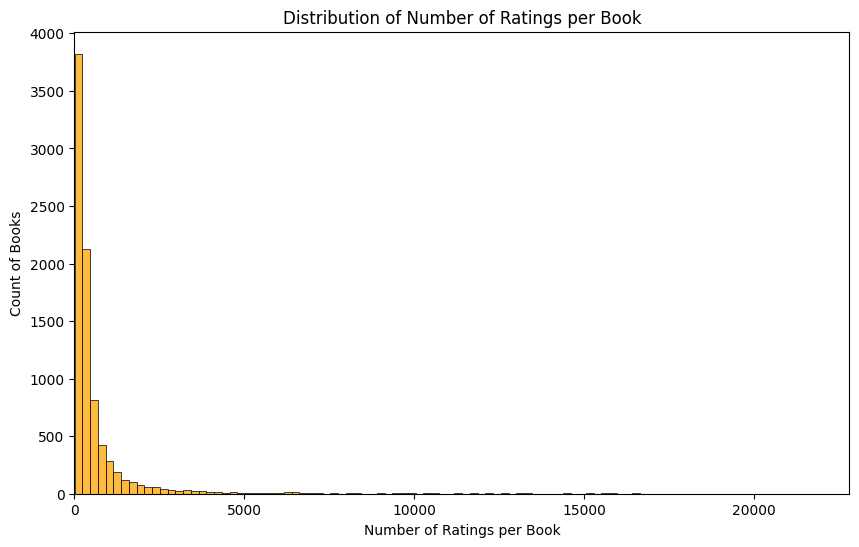

In [12]:
# Calculate the number of ratings per book
book_ratings_count = ratings['book_id'].value_counts().reset_index()
book_ratings_count.columns = ['book_id', 'number_of_ratings_per_book']

# Determine the maximum number of ratings a book has received
max_ratings_per_book = book_ratings_count['number_of_ratings_per_book'].max()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(book_ratings_count['number_of_ratings_per_book'], bins=100, color="orange", kde=False)
plt.xlim(0, max_ratings_per_book)  # Set the upper limit to the maximum number of ratings per book
plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of Ratings per Book')
plt.ylabel('Count of Books')
plt.show()


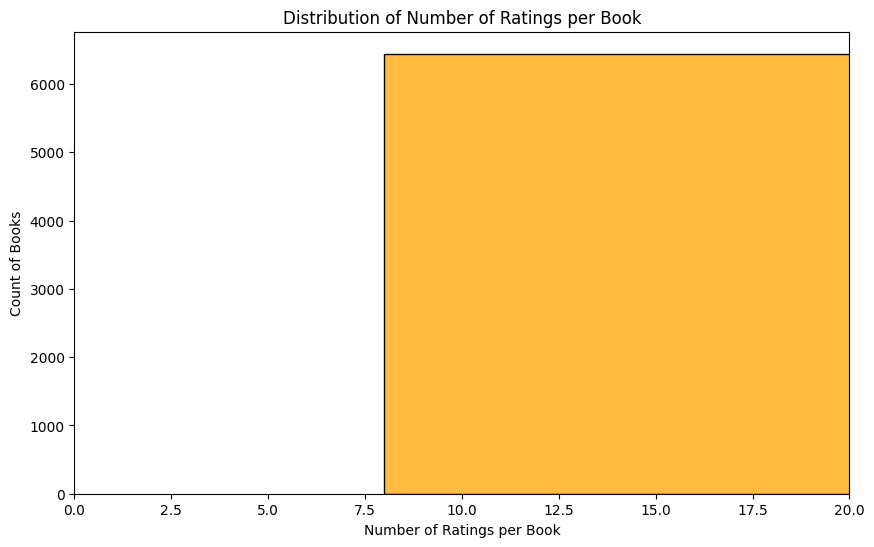

In [13]:
# Calculate the number of ratings per book
book_ratings_count = ratings['book_id'].value_counts().reset_index()
book_ratings_count.columns = ['book_id', 'number_of_ratings_per_book']

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(book_ratings_count['number_of_ratings_per_book'], bins=40, color="orange", kde=False)
plt.xlim(0, 20)  # focusing on the range as per your R code
plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of Ratings per Book')
plt.ylabel('Count of Books')
plt.show()


We can see that in the subsetted dataset most books have around 18-20 ratings. 

Distribution of Mean Book Ratings

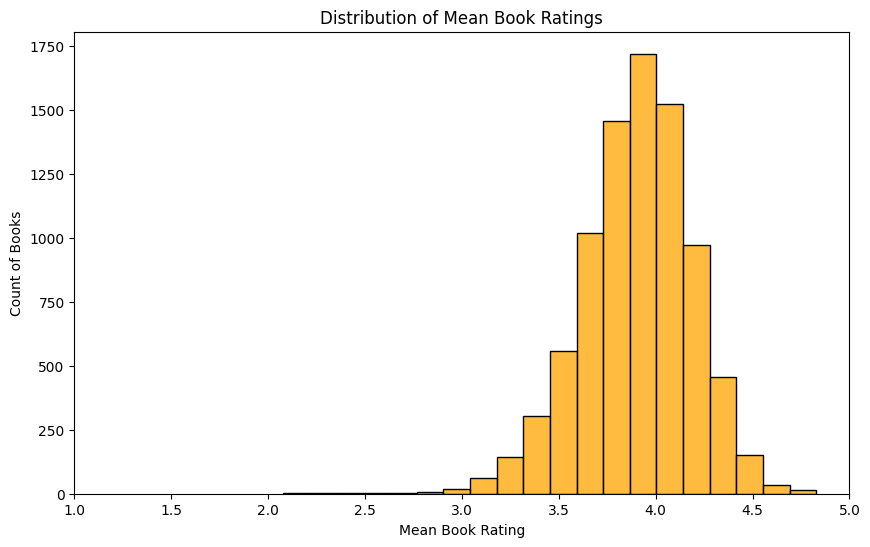

In [14]:
# Calculate mean ratings per book
mean_ratings_book = ratings.groupby('book_id')['rating'].mean().reset_index()
mean_ratings_book.columns = ['book_id', 'mean_book_rating']

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(mean_ratings_book['mean_book_rating'], bins=20, color="orange", kde=False)
plt.title('Distribution of Mean Book Ratings')
plt.xlabel('Mean Book Rating')
plt.ylabel('Count of Books')
plt.xlim(1, 5)  # focusing on the range as per your R code
plt.show()


Distribution of Genres

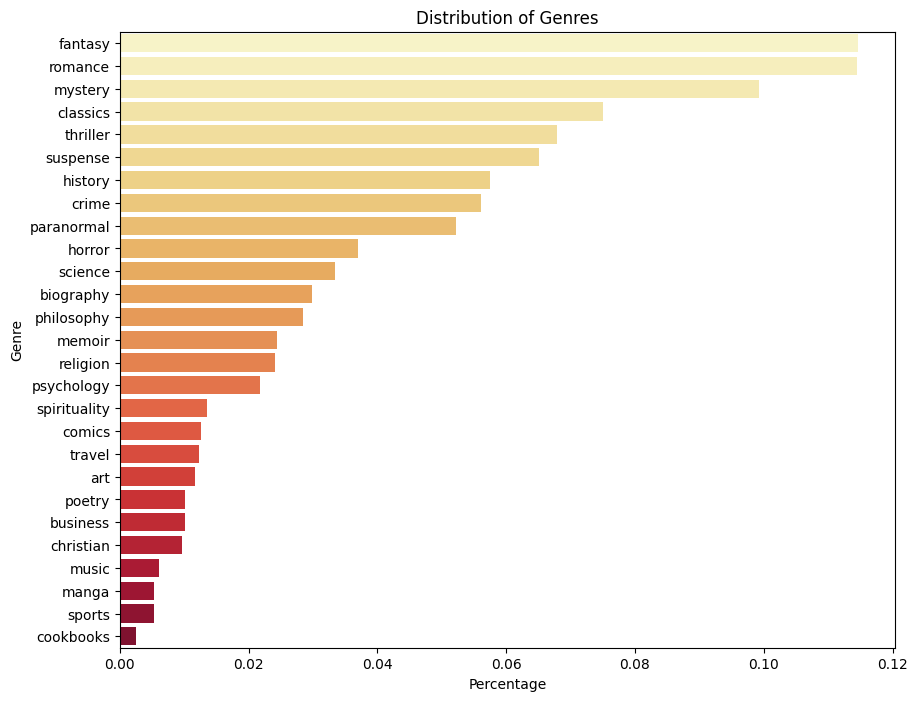

In [15]:
import matplotlib.pyplot as plt

# Define genre list and exclusions
genres = ["art", "biography", "business", "chick lit", "children's", "christian", "classics", "comics",
          "contemporary", "cookbooks", "crime", "ebooks", "fantasy", "fiction", "gay and lesbian",
          "graphic novels", "historical fiction", "history", "horror", "humor and comedy", "manga",
          "memoir", "music", "mystery", "nonfiction", "paranormal", "philosophy", "poetry", "psychology",
          "religion", "romance", "science", "science fiction", "self help", "suspense", "spirituality",
          "sports", "thriller", "travel", "young adult"]
exclude_genres = ["fiction", "nonfiction", "ebooks", "contemporary"]
genres = [genre for genre in genres if genre not in exclude_genres]

# Filter tags to include only selected genres
filtered_tags = tags[tags['tag_name'].str.lower().isin(genres)]

# Join with book_tags to get the count of each genre
genre_counts = book_tags[book_tags['tag_id'].isin(filtered_tags['tag_id'])]
genre_counts = genre_counts.groupby('tag_id').size().reset_index(name='count')
genre_counts = genre_counts.merge(filtered_tags, on='tag_id')
genre_counts['percentage'] = genre_counts['count'] / genre_counts['count'].sum()

# Plotting
genre_counts = genre_counts.sort_values('percentage', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='percentage', y='tag_name', data=genre_counts, palette='YlOrRd')
plt.title('Distribution of Genres')
plt.xlabel('Percentage')
plt.ylabel('Genre')
plt.show()


Distribution of Books by Language

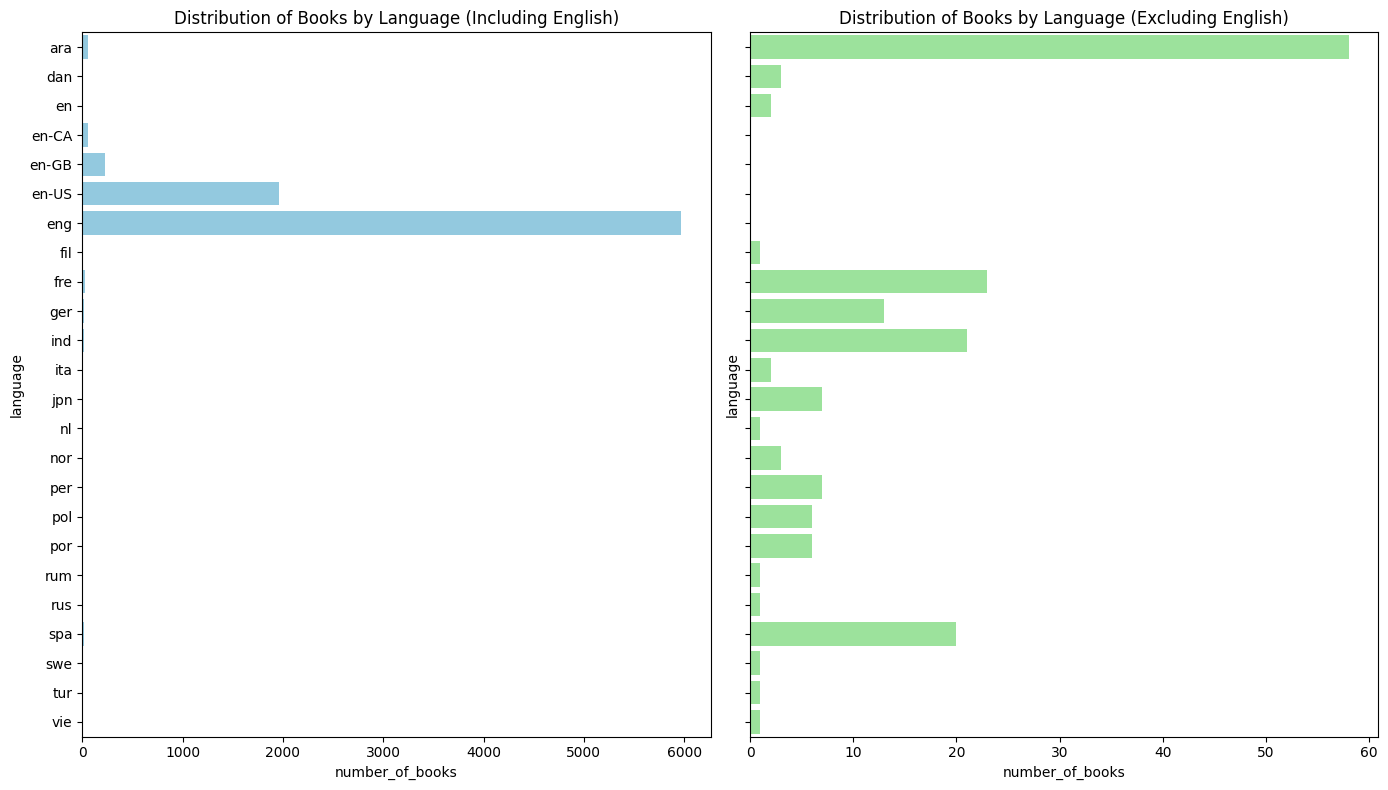

In [16]:
# Prepare data
books['language_code'] = books['language_code'].astype('category')

# Include all languages
language_counts = books['language_code'].value_counts().reset_index()
language_counts.columns = ['language', 'number_of_books']

# Exclude English variants
non_english_counts = books[~books['language_code'].isin(['en-US', 'en-GB', 'eng', 'en-CA', ''])]['language_code'].value_counts().reset_index()
non_english_counts.columns = ['language', 'number_of_books']

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
sns.barplot(x='number_of_books', y='language', data=language_counts, ax=ax[0], color='skyblue')
sns.barplot(x='number_of_books', y='language', data=non_english_counts, ax=ax[1], color='lightgreen')
ax[0].set_title('Distribution of Books by Language (Including English)')
ax[1].set_title('Distribution of Books by Language (Excluding English)')
plt.tight_layout()
plt.show()


Top 10 Rated Books

In [17]:
# Top 10 rated books
top_rated = books.nlargest(10, 'average_rating')
top_rated[['title', 'ratings_count', 'average_rating']]


,title,ratings_count,average_rating
3627,The Complete Calvin and Hobbes,28900,4.82
861,"Words of Radiance (The Stormlight Archive, #2)",73572,4.77
8853,Mark of the Lion Trilogy,9081,4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,22351,4.75
421,"Harry Potter Boxset (Harry Potter, #1-7)",190050,4.74
6360,There's Treasure Everywhere: A Calvin and Hobb...,16766,4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",24618,4.73
6589,The Authoritative Calvin and Hobbes: A Calvin ...,16087,4.73
6919,The Indispensable Calvin and Hobbes,14597,4.73
1307,A Court of Mist and Fury (A Court of Thorns an...,108384,4.72


Top 10 Popular Books

In [18]:
# Top 10 popular books
top_popular = books.nlargest(10, 'ratings_count')
top_popular[['title', 'ratings_count', 'average_rating']]


,title,ratings_count,average_rating
0,"The Hunger Games (The Hunger Games, #1)",4780653,4.34
1,Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44
2,"Twilight (Twilight, #1)",3866839,3.57
3,To Kill a Mockingbird,3198671,4.25
4,The Great Gatsby,2683664,3.89
5,The Fault in Our Stars,2346404,4.26
6,The Hobbit,2071616,4.25
7,The Catcher in the Rye,2044241,3.79
9,Pride and Prejudice,2035490,4.24
8,"Angels & Demons (Robert Langdon, #1)",2001311,3.85


Correlation Matrix for Book Ratings and Other Features

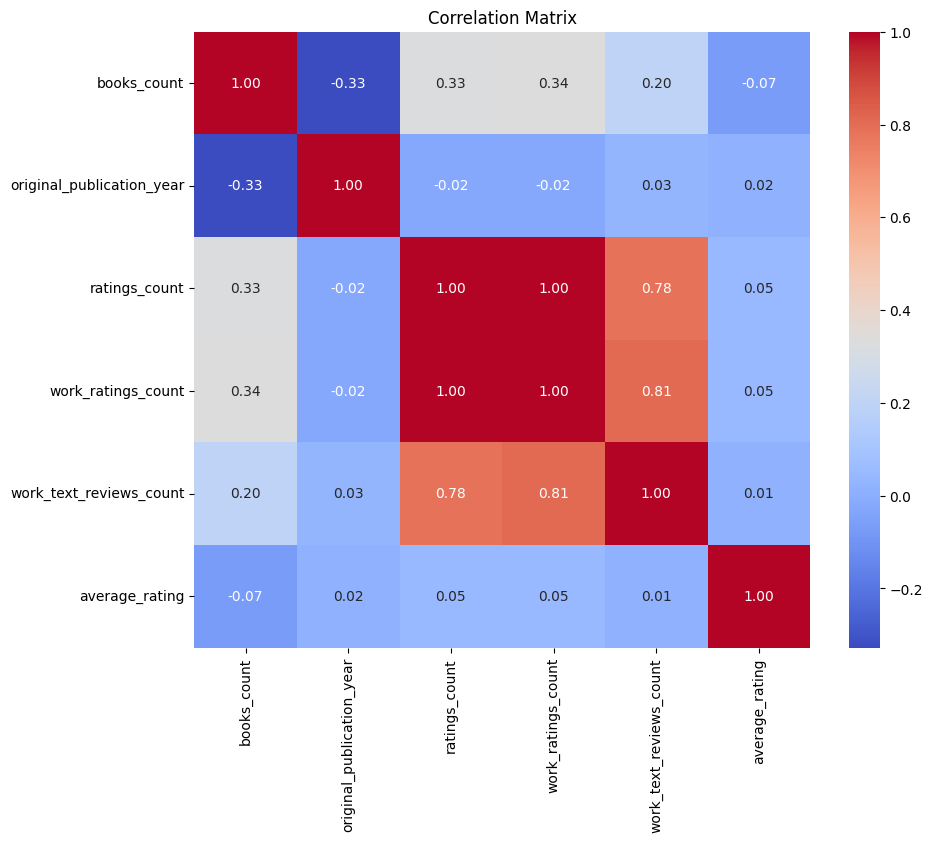

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns
selected_columns = books[['books_count', 'original_publication_year', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'average_rating']]
# Calculating the correlation matrix
corr_matrix = selected_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()


We see only small correlations between the features and the average rating (last row), indicating that there are no strong relationships between the rating a book receives and meta-variables (like rating counts etc.). This means that the rating depends more strongly on other features. 


Relationship Between Number of Ratings and Average Rating

<Figure size 1000x800 with 0 Axes>

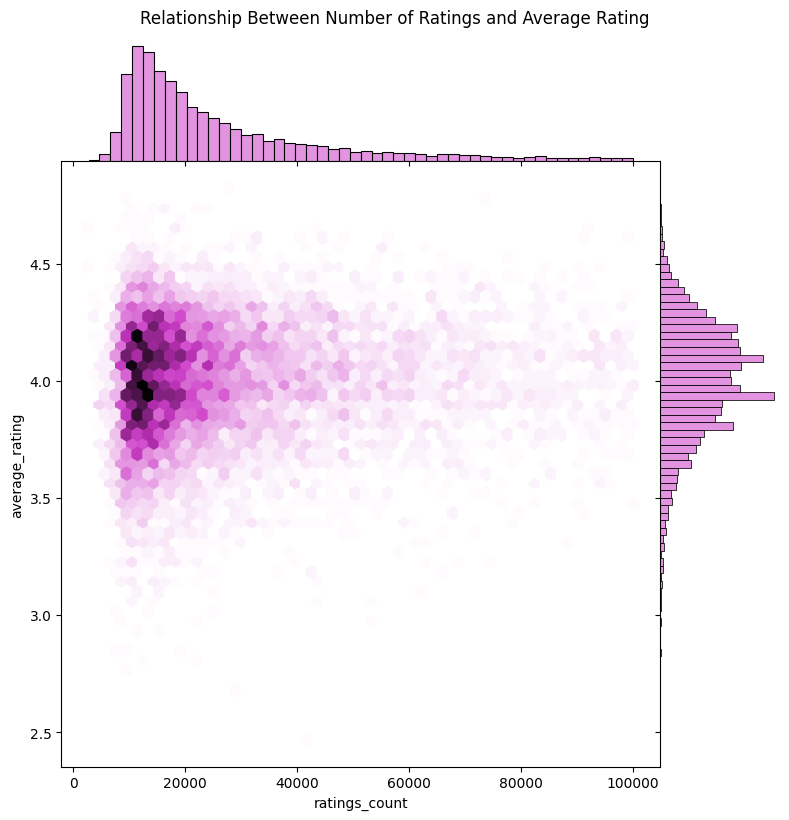

In [20]:
# Filtering books with extreme values
filtered_books = books[books['ratings_count'] < 1e5]

# Plotting
plt.figure(figsize=(10, 8))
sns.jointplot(data=filtered_books, x='ratings_count', y='average_rating', kind='hex', color='orchid', height=8, space=0)
plt.suptitle('Relationship Between Number of Ratings and Average Rating', y=1.02)
plt.show()


Theoretically, it might be that the popularity of a book (in terms of the number of ratings it receives) is associated with the average rating it receives, such that once a book is becoming popular it gets better ratings. However, our data shows that this is not true always.

Relationship Between Number of Editions and Average Rating

<Figure size 1000x800 with 0 Axes>

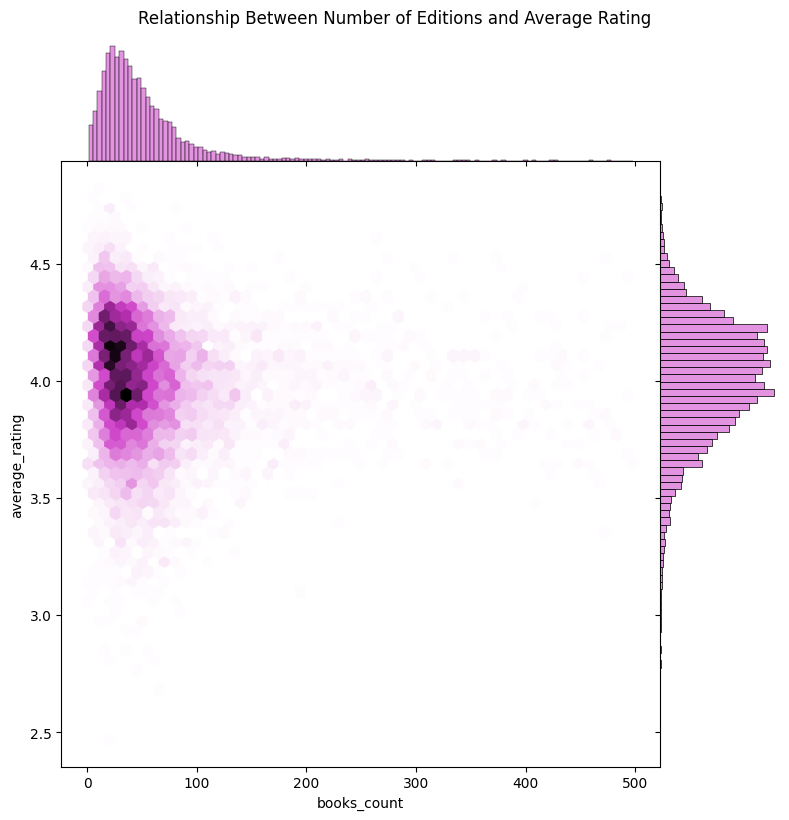

In [21]:
# Filtering to avoid extremes
filtered_books = books[books['books_count'] <= 500]

# Plotting
plt.figure(figsize=(10, 8))
sns.jointplot(data=filtered_books, x='books_count', y='average_rating', kind='hex', color='orchid', height=8, space=0)
plt.suptitle('Relationship Between Number of Editions and Average Rating', y=1.02)
plt.show()


The dataset contains information about how many editions of a book are available in `book_count`. These can either be different editions in the same language or also translations of the book into different languages. So one might assume, that the better the book is the more editions should be available. However, from the plot above we can not see such correlation.

# **Recommender Systems**

**1) Content Filtering Based Approach**



Convert each book to a feature vector(book embedding) based on its title, author, language, average rating, rating counts and its genre.

Then, for a given book (book embedding) find closest(similar) book embeddings and recommend these books.

The code cell given below, creates book hand crafted book embeddings.

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
from gensim.models import Word2Vec
import gensim
from scipy.sparse import csr_matrix

# Load DataFrames
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
book_tags = pd.read_csv('book_tags.csv')

# Data preprocessing
ratings = ratings.drop_duplicates(subset=['user_id', 'book_id'])
ratings = ratings[ratings['user_id'].isin(ratings['user_id'].value_counts()[ratings['user_id'].value_counts() >= 3].index)]


books.drop_duplicates(subset='title', inplace=True)
books.dropna(subset=['original_title'], inplace=True)
books = books[~books['book_id'].isin(books[books.isnull().any(axis=1)]['book_id'])]

# Remove any ratings that do not have a corresponding book in the books DataFrame
ratings = ratings[ratings['book_id'].isin(books.index)]

# Prepare text data for Word2Vec
books['original_title'].fillna('unknown', inplace=True)
books['authors'] = books['authors'].str.replace(' ', '_')  # Replace spaces in names to treat them as single tokens
titles = books['original_title'].apply(lambda x: x.split())
authors = books['authors'].apply(lambda x: x.split(','))

# Train Word2Vec models
title_model = Word2Vec(sentences=titles, vector_size=50, window=3, min_count=1, workers=4)
author_model = Word2Vec(sentences=authors, vector_size=50, window=3, min_count=1, workers=4)

# Create feature vectors using Word2Vec
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=50):
    if len(tokens_list) < 1:
        return np.zeros(k)
    vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    return np.mean(vectorized, axis=0)

books['title_vector'] = books['original_title'].apply(lambda x: get_average_word2vec(x.split(), title_model.wv))
books['author_vector'] = books['authors'].apply(lambda x: get_average_word2vec(x.split(','), author_model.wv))

# Combine Word2Vec features with other features

title_vectors = csr_matrix(list(books['title_vector']))
author_vectors = csr_matrix(list(books['author_vector']))
language_encoded = OneHotEncoder().fit_transform(books[['language_code']])
numeric_features = MinMaxScaler().fit_transform(books[['average_rating', 'ratings_count']])


# Preparing genre data
genres = ["art", "biography", "business", "chick lit", "children's", "christian", "classics", "comics",
          "contemporary", "cookbooks", "crime", "fantasy", "graphic novels", "historical fiction", 
          "history", "horror", "humor and comedy", "manga", "memoir", "music", "mystery", "paranormal", 
          "philosophy", "poetry", "psychology", "religion", "romance", "science", "science fiction", 
          "self help", "suspense", "spirituality", "sports", "thriller", "travel", "young adult"]
exclude_genres = ["fiction", "nonfiction", "ebooks", "contemporary"]
genres = [genre for genre in genres if genre not in exclude_genres]
filtered_tags = tags[tags['tag_name'].str.lower().isin(genres)]
book_genre_tags = pd.merge(book_tags, filtered_tags, left_on='tag_id', right_on='tag_id')
book_genres = book_genre_tags.groupby('goodreads_book_id')['tag_name'].apply(list).reset_index()

# MultiLabel Binarizer for genre data
mlb = MultiLabelBinarizer()
book_genre_matrix = mlb.fit_transform(book_genres['tag_name'])
book_genre_df = pd.DataFrame(book_genre_matrix, columns=mlb.classes_, index=book_genres['goodreads_book_id'])

# Align books DataFrame with genre data
books.set_index('goodreads_book_id', inplace=True)
books = books.join(book_genre_df).fillna(0).reset_index()

feature_vectors = hstack([title_vectors, author_vectors, language_encoded, numeric_features, books[mlb.classes_]])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(feature_vectors, feature_vectors)

# Function to recommend books
def recommend_books(book_title, k=10):
    try:
        idx = books[books['original_title'] == book_title].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:k+1]
        book_indices = [i[0] for i in sim_scores]
        return books.iloc[book_indices][['original_title', 'authors', 'average_rating']]
    except IndexError:
        return "Book title not found in the dataset."

# Test the recommendation function
sample_book_title = books.iloc[1]['original_title']
print(f"Recommendations for: {sample_book_title}")
print(recommend_books(sample_book_title))


Recommendations for: Harry Potter and the Philosopher's Stone
                                         original_title  \
17             Harry Potter and the Prisoner of Azkaban   
22              Harry Potter and the Chamber of Secrets   
23                  Harry Potter and the Goblet of Fire   
7355  The Dark Is Rising Sequence (The Dark Is Risin...   
24                 Harry Potter and the Deathly Hallows   
3241       Harry Potter Collection (Harry Potter, #1-6)   
26               Harry Potter and the Half-Blood Prince   
6467                                            Skellig   
40                                  The Lightning Thief   
90                                    The Secret Garden   

                                      authors  average_rating  
17    J.K._Rowling,_Mary_GrandPré,_Rufus_Beck            4.53  
22                J.K._Rowling,_Mary_GrandPré            4.37  
23                J.K._Rowling,_Mary_GrandPré            4.53  
7355                            

Now we can also recommend books for each user.


Method 1: User Profile Vector

Compute a weighted average of the book feature vectors for each user based on the books they have rated. The weights could be the ratings themselves. This creates a "profile" vector for each user that represents their preferences. Find the closest book embeddings to the user profile vector.

In [23]:
feature_vectors_csr = feature_vectors.tocsr()
def user_profile_vector_recommend(user_id, k=10):
    # Step 1: Get user ratings
    user_ratings = ratings[ratings['user_id'] == user_id]
    # Step 2: Compute weighted feature vectors
    if not user_ratings.empty:
        user_books = books[books['book_id'].isin(user_ratings['book_id'])]

        # Output the books the user has rated
        print("Books rated by user {}: ".format(user_id))
        for index, row in user_books.iterrows():
            print(f"Book ID: {row['book_id']}, Title: {row['original_title']}, Rating: {user_ratings[user_ratings['book_id'] == row['book_id']].iloc[0]['rating']}")

        # Retrieve the feature vectors for books rated by this user
        user_feature_vectors = feature_vectors_csr[user_books.index]
        
        # Get the ratings and reshape for broadcasting
        weights = user_ratings.set_index('book_id').loc[user_books['book_id']]['rating'].values.reshape(-1, 1).flatten() 

        # Compute weighted average feature vector
        weighted_feature_vector = np.average(user_feature_vectors.toarray(), axis=0, weights=weights)
        
        # Normalize the weighted vector to prevent scaling issues
        norm_weighted_feature_vector = weighted_feature_vector / np.linalg.norm(weighted_feature_vector)
        
        # Step 3: Find similar books
        # Compute cosine similarity between the weighted user vector and all book vectors
        sim_scores = cosine_similarity(norm_weighted_feature_vector.reshape(1, -1), feature_vectors_csr)
        
        # Get top K similar books excluding already rated ones
        sim_scores = sim_scores.flatten()
        sorted_book_indices = np.argsort(-sim_scores)
        recommended_books = [idx for idx in sorted_book_indices if idx not in user_books.index][:k]

        print("\nRecommended books based on user's ratings:")

        return books.iloc[recommended_books][['original_title', 'authors', 'average_rating']]
    else:
        return "No ratings available for this user."

# Example usage
user_id = 123  # Example user ID
print(f"Recommendations for User ID {user_id}")
print(user_profile_vector_recommend(user_id))


Recommendations for User ID 123
Books rated by user 123: 
Book ID: 3, Title: Twilight, Rating: 5
Book ID: 4, Title: To Kill a Mockingbird, Rating: 3
Book ID: 5, Title: The Great Gatsby, Rating: 4
Book ID: 6, Title: The Fault in Our Stars, Rating: 5
Book ID: 11, Title: The Kite Runner , Rating: 5
Book ID: 15, Title: Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944, Rating: 5
Book ID: 16, Title: Män som hatar kvinnor, Rating: 4
Book ID: 22, Title: The Lovely Bones, Rating: 5
Book ID: 26, Title: The Da Vinci Code, Rating: 5
Book ID: 30, Title: Gone Girl, Rating: 3
Book ID: 32, Title: Of Mice and Men , Rating: 4
Book ID: 34, Title: Fifty Shades of Grey, Rating: 3
Book ID: 38, Title: The Time Traveler's Wife, Rating: 5
Book ID: 40, Title: Eat, pray, love: one woman's search for everything across Italy, India and Indonesia, Rating: 5
Book ID: 46, Title: Water for Elephants, Rating: 5
Book ID: 49, Title: New Moon (Twilight, #2), Rating: 5
Book ID: 52, Title: Eclipse, Rating: 5
Bo

Method 2: Aggregate Similarity Scoring

For each book that the user has not rated, calculate the similarity score with all books the user has rated. Aggregate these scores to form a recommendation score. This aggregation could be a weighted sum, where weights are the ratings given by the user.

In [24]:
feature_vectors_csr = feature_vectors.tocsr()
def aggregate_similarity_recommendations(user_id, k=10):
    # Step 1: Get the books rated by this user
    user_ratings = ratings[ratings['user_id'] == user_id]
    
    if user_ratings.empty:
        return "No ratings available for this user."
    
    # Step 2: Extract the rated book indices
    rated_indices = books[books['book_id'].isin(user_ratings['book_id'])].index.tolist()
    
    # Extract feature vectors for these rated books
    rated_feature_vectors = feature_vectors_csr[rated_indices]
    
    # Get the user's ratings for these books for weighting
    user_ratings = user_ratings.set_index('book_id').loc[books.iloc[rated_indices]['book_id']]['rating'].values
    
    # Step 3: Compute similarities and aggregate scores
    similarity_scores = cosine_similarity(rated_feature_vectors, feature_vectors_csr)
    
    # Aggregate scores weighted by user ratings
    # Multiply each similarity row by the user's rating for that book and sum across rows
    weighted_scores = np.dot(similarity_scores.T, user_ratings)
    
    # Step 4: Rank books by the weighted score and recommend top k books not yet rated by the user
    # Exclude already rated books from recommendations
    recommended_indices = np.argsort(-weighted_scores)
    recommended_books = [idx for idx in recommended_indices if idx not in rated_indices][:k]
    
    # Return the recommended books' details
    recommended_books_details = books.iloc[recommended_books][['original_title', 'authors', 'average_rating']]
    
    # Output the books rated by the user (for transparency and debugging)
    print("Books rated by user {}:".format(user_id))
    display_books = books.iloc[rated_indices][['original_title', 'authors', 'average_rating']]
    for index, row in display_books.iterrows():
        print(f"Title: {row['original_title']}, Rating: {user_ratings[display_books.index.get_loc(index)]}")

    print("\nRecommended books based on user's ratings:")
    return recommended_books_details

# Example usage
user_id = 123  # Example user ID
print(f"Recommendations for User ID {user_id}")
print(aggregate_similarity_recommendations(user_id))


Recommendations for User ID 123
Books rated by user 123:
Title: Twilight, Rating: 5
Title: To Kill a Mockingbird, Rating: 3
Title: The Great Gatsby, Rating: 4
Title: The Fault in Our Stars, Rating: 5
Title: The Kite Runner , Rating: 5
Title: Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944, Rating: 5
Title: Män som hatar kvinnor, Rating: 4
Title: The Lovely Bones, Rating: 5
Title: The Da Vinci Code, Rating: 5
Title: Gone Girl, Rating: 3
Title: Of Mice and Men , Rating: 4
Title: Fifty Shades of Grey, Rating: 3
Title: The Time Traveler's Wife, Rating: 5
Title: Eat, pray, love: one woman's search for everything across Italy, India and Indonesia, Rating: 5
Title: Water for Elephants, Rating: 5
Title: New Moon (Twilight, #2), Rating: 5
Title: Eclipse, Rating: 5
Title: Breaking Dawn, Rating: 5
Title: The Secret Life of Bees, Rating: 5
Title: The Adventures of Huckleberry Finn, Rating: 3
Title: The Girl on the Train, Rating: 4
Title: Wuthering Heights, Rating: 3
Title: My Sister'

Method 3: Clustering-based Recommendation

Use clustering algorithms (like K-means) on the feature vectors to find clusters of similar books.

Identify which clusters the user's highly rated books fall into. Recommend other books from these clusters, prioritizing those from clusters with the highest rated books by the user.

In [25]:
from sklearn.cluster import KMeans

# Step 1: Cluster the Books
def cluster_books(feature_vectors, num_clusters=10):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(feature_vectors)
    return clusters

# Choose an appropriate number of clusters (this might need tuning)
num_clusters = 10
book_clusters = cluster_books(feature_vectors, num_clusters=num_clusters)
books['cluster'] = book_clusters

# Step 2: Recommend books based on clusters of user's highly rated books
def recommend_books_by_clusters(user_id, k=10):
    user_ratings = ratings[ratings['user_id'] == user_id]
    if user_ratings.empty:
        return "No ratings available for this user."

    # Get the books and their ratings
    user_books = books.loc[books['book_id'].isin(user_ratings['book_id'])]
    user_books = user_books.join(user_ratings.set_index('book_id'), on='book_id')
    
    # Focus on books rated 4 or above (or choose your threshold)
    high_rated_books = user_books[user_books['rating'] >= 4]
    
    # Get the clusters of these highly rated books
    clusters_of_interest = high_rated_books['cluster'].unique()

    # Recommend books from these clusters
    recommended_books = books[books['cluster'].isin(clusters_of_interest)]
    
    # Exclude already rated books and get top k recommendations
    recommended_books = recommended_books[~recommended_books['book_id'].isin(user_ratings['book_id'])]
    recommended_books = recommended_books.sample(min(k, len(recommended_books)))

    print("Books rated by user {}: ".format(user_id))
    for index, row in user_books.iterrows():
        print(f"Book ID: {row['book_id']}, Title: {row['original_title']}, Rating: {row['rating']}")

    print("\nRecommended books based on user's preferred clusters:")
    return recommended_books[['original_title', 'authors', 'average_rating']]

# Example usage
user_id = 123  # Example user ID
print(f"Recommendations for User ID {user_id}")
print(recommend_books_by_clusters(user_id))


d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Recommendations for User ID 123
Books rated by user 123: 
Book ID: 3, Title: Twilight, Rating: 5
Book ID: 4, Title: To Kill a Mockingbird, Rating: 3
Book ID: 5, Title: The Great Gatsby, Rating: 4
Book ID: 6, Title: The Fault in Our Stars, Rating: 5
Book ID: 11, Title: The Kite Runner , Rating: 5
Book ID: 15, Title: Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944, Rating: 5
Book ID: 16, Title: Män som hatar kvinnor, Rating: 4
Book ID: 22, Title: The Lovely Bones, Rating: 5
Book ID: 26, Title: The Da Vinci Code, Rating: 5
Book ID: 30, Title: Gone Girl, Rating: 3
Book ID: 32, Title: Of Mice and Men , Rating: 4
Book ID: 34, Title: Fifty Shades of Grey, Rating: 3
Book ID: 38, Title: The Time Traveler's Wife, Rating: 5
Book ID: 40, Title: Eat, pray, love: one woman's search for everything across Italy, India and Indonesia, Rating: 5
Book ID: 46, Title: Water for Elephants, Rating: 5
Book ID: 49, Title: New Moon (Twilight, #2), Rating: 5
Book ID: 52, Title: Eclipse, Rating: 5
Bo

**2) User Based Colloborative Filtering**

The user-based collaborative filtering algorithm implemented in the code works by first creating a sparse user-item matrix from user ratings data, where rows represent users and columns represent books. Each entry in this matrix denotes the rating a user has given to a book. Using this matrix, cosine similarity is computed to determine the similarity between all pairs of users based on their rating patterns. These similarity scores are then used as weights to compute weighted sums of ratings, producing predicted ratings for each book for a specified user. The predictions are normalized by dividing by the sum of the absolute values of the similarity scores to account for variations in rating scales and number of ratings. The algorithm ensures that books already rated by the user are excluded from the recommendations by setting their predicted ratings to zero. Finally, the system recommends the top-k books with the highest predicted ratings, effectively using patterns and preferences from similar users to generate personalized book recommendations. This method leverages collective user behavior to suggest new books that the user might like, thereby harnessing the power of collaborative filtering.

Please be careful this computation requires 30gb of memory!

In [26]:
""" import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Directly creating a sparse user-item matrix
def create_user_item_matrix(ratings):
    # Use the COO format to create the matrix, then convert to CSR
    rows = ratings['user_id'].astype('category').cat.codes
    cols = ratings['book_id'].astype('category').cat.codes
    data = ratings['rating'].astype('float16')
    
    sparse_matrix = csr_matrix((data, (rows, cols)), shape=(ratings['user_id'].nunique(), ratings['book_id'].nunique()))
    return sparse_matrix

user_item_matrix_sparse = create_user_item_matrix(ratings)

# Compute user-user cosine similarity matrix, handle sparse format
user_similarity = cosine_similarity(user_item_matrix_sparse, dense_output=False)

def recommend_books_collaborative(user_id, user_similarity, user_item_matrix, k=10):
    # Translate user_id to user index in the matrix
    user_index = ratings[ratings['user_id'] == user_id]['user_id'].astype('category').cat.codes.iloc[0]
    sim_scores = user_similarity[user_index]

    # Calculate weighted ratings
    weighted_ratings = sim_scores.dot(user_item_matrix).toarray().ravel()
    sum_of_weights = np.abs(sim_scores).sum()

    # Normalize ratings
    predicted_ratings = np.divide(weighted_ratings, sum_of_weights, where=(sum_of_weights != 0))

    # Zero out already rated items
    known_items_indices = user_item_matrix[user_index].nonzero()[1]
    predicted_ratings[known_items_indices] = 0

    # Get top k recommendations
    recommended_indices = np.argsort(-predicted_ratings)[:k]
    recommended_book_ids = ratings.iloc[recommended_indices]['book_id'].unique()  # Make sure to map back to original IDs
    recommended_books = books[books['book_id'].isin(recommended_book_ids)]
    
    return recommended_books[['book_id', 'original_title', 'authors']]

# Example usage
user_id = 123  # Example user ID
recommended_books = recommend_books_collaborative(user_id, user_similarity, user_item_matrix_sparse)
print(f"Recommendations for User ID {user_id}:")
print(recommended_books)
 """

' import pandas as pd\nimport numpy as np\nfrom scipy.sparse import csr_matrix\nfrom sklearn.metrics.pairwise import cosine_similarity\n\n# Directly creating a sparse user-item matrix\ndef create_user_item_matrix(ratings):\n    # Use the COO format to create the matrix, then convert to CSR\n    rows = ratings[\'user_id\'].astype(\'category\').cat.codes\n    cols = ratings[\'book_id\'].astype(\'category\').cat.codes\n    data = ratings[\'rating\'].astype(\'float16\')\n    \n    sparse_matrix = csr_matrix((data, (rows, cols)), shape=(ratings[\'user_id\'].nunique(), ratings[\'book_id\'].nunique()))\n    return sparse_matrix\n\nuser_item_matrix_sparse = create_user_item_matrix(ratings)\n\n# Compute user-user cosine similarity matrix, handle sparse format\nuser_similarity = cosine_similarity(user_item_matrix_sparse, dense_output=False)\n\ndef recommend_books_collaborative(user_id, user_similarity, user_item_matrix, k=10):\n    # Translate user_id to user index in the matrix\n    user_index 

Since the method above requires too much memory, we can use different matrix factorization methods to make it more computationally efficient.

Matrix Factorization is one of the most effective methods for dealing with large-scale datasets in recommendation systems. Techniques like Singular Value Decomposition (SVD), Non-negative Matrix Factorization (NMF), or using algorithms such as Alternating Least Squares (ALS) decompose the user-item matrix into lower-dimensional matrices. This reduction not only alleviates memory strain but also helps in capturing latent factors underlying the interactions between users and items.

Singular Value Decomposition

In [28]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import normalize

# Create a sparse user-item matrix
def create_user_item_matrix(ratings):
    rows = ratings['user_id'].astype('category').cat.codes
    cols = ratings['book_id'].astype('category').cat.codes
    data = ratings['rating'].astype(np.float32)
    
    sparse_matrix = csr_matrix((data, (rows, cols)), shape=(ratings['user_id'].nunique(), ratings['book_id'].nunique()))
    return sparse_matrix

# SVD for matrix factorization
def matrix_factorization(S, sigma, VT, k=1000):
    # Take only the top k components which capture most of the variance
    sigma = np.diag(sigma[:k])
    S = S[:, :k]
    VT = VT[:k, :]
    
    # Recreate the approximated matrix
    approximated_matrix = np.dot(np.dot(S, sigma), VT)
    return approximated_matrix

user_item_matrix_sparse = create_user_item_matrix(ratings)
U, sigma, VT = svds(user_item_matrix_sparse, k=100)  # You can adjust 'k' based on your need
user_item_matrix_approx = matrix_factorization(U, sigma, VT)

# Normalize the approximated matrix for better comparison
user_item_matrix_normalized = normalize(user_item_matrix_approx, norm='l2', axis=1)

def recommend_books(user_id, user_item_matrix, k=10):
    user_index = ratings[ratings['user_id'] == user_id]['user_id'].astype('category').cat.codes.iloc[0]
    predicted_ratings = user_item_matrix[user_index]

    # Zero out already rated items
    known_items_indices = user_item_matrix_sparse[user_index].nonzero()[1]
    predicted_ratings[known_items_indices] = 0

    # Get top k recommendations
    recommended_indices = np.argsort(-predicted_ratings)[:k]
    recommended_book_ids = ratings.iloc[recommended_indices]['book_id'].unique()
    recommended_books = books[books['book_id'].isin(recommended_book_ids)]
    
    return recommended_books[['book_id', 'original_title', 'authors']]

# Example usage
user_id = 123
recommended_books = recommend_books(user_id, user_item_matrix_normalized)
print(f"Recommendations for User ID {user_id}:")
print(recommended_books)


MemoryError: Unable to allocate 10.6 GiB for an array with shape (53424, 53424) and data type float32

NMF 

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

# Create a sparse user-item matrix
def create_user_item_matrix(ratings):
    rows = ratings['user_id'].astype('category').cat.codes
    cols = ratings['book_id'].astype('category').cat.codes
    data = ratings['rating'].astype(np.float32)
    
    sparse_matrix = csr_matrix((data, (rows, cols)), shape=(ratings['user_id'].nunique(), ratings['book_id'].nunique()))
    return sparse_matrix

# NMF for matrix factorization
def apply_nmf(sparse_matrix, n_components=100):
    model = NMF(n_components=n_components, init='random', random_state=42)
    W = model.fit_transform(sparse_matrix)  # User features matrix
    H = model.components_  # Item features matrix
    
    # Reconstruct the matrix from factors
    reconstructed_matrix = np.dot(W, H)
    return reconstructed_matrix

user_item_matrix_sparse = create_user_item_matrix(ratings)
user_item_matrix_approx = apply_nmf(user_item_matrix_sparse, n_components=10)  # Adjust 'n_components' as needed

# Normalize the approximated matrix for better comparison
user_item_matrix_normalized = normalize(user_item_matrix_approx, norm='l2', axis=1)

def recommend_books(user_id, user_item_matrix, k=10):
    user_index = ratings[ratings['user_id'] == user_id]['user_id'].astype('category').cat.codes.iloc[0]
    predicted_ratings = user_item_matrix[user_index]

    # Zero out already rated items
    known_items_indices = user_item_matrix_sparse[user_index].nonzero()[1]
    predicted_ratings[known_items_indices] = 0

    # Get top k recommendations
    recommended_indices = np.argsort(-predicted_ratings)[:k]
    recommended_book_ids = ratings.iloc[recommended_indices]['book_id'].unique()
    recommended_books = books[books['book_id'].isin(recommended_book_ids)]
    
    return recommended_books[['book_id', 'original_title', 'authors']]

# Example usage
user_id = 123
recommended_books = recommend_books(user_id, user_item_matrix_normalized)
print(f"Recommendations for User ID {user_id}:")
print(recommended_books)


Recommendations for User ID 123:
      book_id                          original_title  \
10         11                        The Kite Runner    
12         13                    Nineteen Eighty-Four   
25         26                       The Da Vinci Code   
26         27  Harry Potter and the Half-Blood Prince   
45         47                          The Book Thief   
107       111            The Memory Keeper's Daughter   
223       238                   Running with Scissors   
242       258                    La sombra del viento   
282       301                       Heart of Darkness   
2543     2903                       The Power of Myth   

                                      authors  
10                            Khaled_Hosseini  
12    George_Orwell,_Erich_Fromm,_Celâl_Üster  
25                                  Dan_Brown  
26                J.K._Rowling,_Mary_GrandPré  
45                               Markus_Zusak  
107                               Kim_Edwards  
223

ALS

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import implicit

# Create a sparse user-item matrix
def create_user_item_matrix(ratings):
    rows = ratings['user_id'].astype('category').cat.codes
    cols = ratings['book_id'].astype('category').cat.codes
    data = ratings['rating'].astype(np.float32)
    
    # Create a sparse matrix with items as rows and users as columns for implicit library
    sparse_matrix = csr_matrix((data, (cols, rows)), shape=(ratings['book_id'].nunique(), ratings['user_id'].nunique()))
    return sparse_matrix

# ALS for matrix factorization
def apply_als(sparse_matrix, factors=10, regularization=0.1, iterations=20):
    model = implicit.als.AlternatingLeastSquares(factors=factors, regularization=regularization, iterations=iterations)
    # Train the model on a sparse matrix of item/user/confidence weights
    # Implicit expects data as item-user that's why we transpose
    model.fit(sparse_matrix.T)
    return model

user_item_matrix_sparse = create_user_item_matrix(ratings)
als_model = apply_als(user_item_matrix_sparse)

# Get the user and item vectors from ALS model
user_factors = als_model.user_factors
item_factors = als_model.item_factors

def recommend_books(user_id, user_factors, item_factors, k=10):
    user_index = ratings[ratings['user_id'] == user_id]['user_id'].astype('category').cat.codes.iloc[0]
    # Compute the score using dot product of user factors and item factors transpose
    scores = np.dot(user_factors[user_index], item_factors.T)
    
    # Zero out already rated items
    known_items_indices = user_item_matrix_sparse[:, user_index].nonzero()[0]
    scores[known_items_indices] = -np.inf  # Use -inf to ensure these are not recommended

    # Get top k recommendations
    recommended_indices = np.argsort(-scores)[:k]
    recommended_book_ids = ratings.iloc[recommended_indices]['book_id'].unique()
    recommended_books = books[books['book_id'].isin(recommended_book_ids)]
    
    return recommended_books[['book_id', 'original_title', 'authors']]

# Example usage
user_id = 123
recommended_books = recommend_books(user_id, user_factors, item_factors)
print(f"Recommendations for User ID {user_id}:")
print(recommended_books)


d:\Python\Python310\lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: OpenBLAS is configured to use 12 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
d:\Python\Python310\lib\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.1107938289642334 seconds
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

Recommendations for User ID 123:
      book_id                            original_title  \
17         18  Harry Potter and the Prisoner of Azkaban   
25         26                         The Da Vinci Code   
26         27    Harry Potter and the Half-Blood Prince   
45         47                            The Book Thief   
81         84                             Jurassic Park   
191       200                        Ten Little Niggers   
223       238                     Running with Scissors   
282       301                         Heart of Darkness   
2543     2903                         The Power of Myth   
6690     8329                         Paris to the Moon   

                                      authors  
17    J.K._Rowling,_Mary_GrandPré,_Rufus_Beck  
25                                  Dan_Brown  
26                J.K._Rowling,_Mary_GrandPré  
45                               Markus_Zusak  
81                           Michael_Crichton  
191                          

**3) Item Based Collaborative Filteriing**

The item-based collaborative filtering algorithm implemented in the code works by first creating a sparse item-user matrix from user ratings data, where rows represent books (items) and columns represent users. Each entry in this matrix denotes the rating given to a book by a user. Using this matrix, cosine similarity is computed to determine the similarity between all pairs of items based on the ratings they have received from users. These similarity scores are then used to recommend books.

When recommending books, the algorithm identifies books that are most similar to those that a particular user has rated highly. For each book that the user has not rated, the system predicts a rating by calculating a weighted average of ratings that the user has given to other books, with weights given by the similarity scores between the books. This process normalizes the influence of highly similar books, ensuring that they have a greater impact on the recommendation.

The recommendations are filtered to ensure that books already rated by the user are excluded. This ensures that the system recommends new books that the user is likely to enjoy based on their past preferences. The final output is a list of the top-k books with the highest predicted ratings for the user, effectively using the relationships between items to provide personalized recommendations. This method leverages the similarities among books to suggest new titles that align with the user's reading history, harnessing the power of collaborative filtering from an item-centric perspective.

Here since this method do not require too much memory, we dont need matrix factorization.

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

def create_item_user_matrix(ratings):
    # Convert book IDs and user IDs to categorical types for consistent indexing
    ratings['user_id'] = ratings['user_id'].astype('category')
    ratings['book_id'] = ratings['book_id'].astype('category')

    # Use the COO format to create the matrix, then convert to CSR
    cols = ratings['user_id'].cat.codes
    rows = ratings['book_id'].cat.codes
    data = ratings['rating'].astype('float16')

    sparse_matrix = csr_matrix((data, (rows, cols)), shape=(ratings['book_id'].nunique(), ratings['user_id'].nunique()))
    return sparse_matrix, ratings['book_id'].cat.categories

item_user_matrix_sparse, book_index_to_id_mapping = create_item_user_matrix(ratings)

# Compute item-item cosine similarity matrix
item_similarity = cosine_similarity(item_user_matrix_sparse, dense_output=False)

def recommend_books_item_based(book_id, item_similarity, book_index_to_id_mapping, k=10):
    try:
        # Translate book_id to item index in the matrix
        book_index = np.where(book_index_to_id_mapping == book_id)[0][0]
    except IndexError:
        return "Book ID not found in the dataset."

    sim_scores = item_similarity[book_index]

    # Get top k items with highest similarity scores excluding the item itself
    sim_scores = sim_scores.toarray().ravel()
    sim_scores[book_index] = 0  # Exclude self
    recommended_indices = np.argsort(-sim_scores)[:k]
    
    # Translate back to book IDs using the mapping
    recommended_book_ids = book_index_to_id_mapping[recommended_indices]
    
    # Retrieve recommended books details
    recommended_books = books[books['book_id'].isin(recommended_book_ids)]
    return recommended_books[['book_id', 'original_title', 'authors']]

# Example usage: Recommend books similar to a given book_id
book_id = 5  # Example book ID
recommended_books = recommend_books_item_based(book_id, item_similarity, book_index_to_id_mapping)
print(f"Recommendations for Book ID {book_id}:")
print(recommended_books)

Recommendations for Book ID 5:
    book_id                                     original_title  \
1         2           Harry Potter and the Philosopher's Stone   
3         4                              To Kill a Mockingbird   
7         8                             The Catcher in the Rye   
9        10                                Pride and Prejudice   
12       13                               Nineteen Eighty-Four   
13       14                         Animal Farm: A Fairy Story   
27       28                                 Lord of the Flies    
28       29  An Excellent conceited Tragedie of Romeo and J...   
31       32                                   Of Mice and Men    
42       43                                          Jane Eyre   

                                          authors  
1                     J.K._Rowling,_Mary_GrandPré  
3                                      Harper_Lee  
7                                   J.D._Salinger  
9                                 

Performance of Collaborative Filtering Algorithms

**4) One KNN Recommender Example**

Matrix ' $X$ ': This is a user-item rating matrix where rows represent books and columns represent users. The value at position ' $(i, j)$ ' represents the rating given by user ' $j$ ' to book ' $i$ '. This matrix is stored in a compressed sparse row (CSR) format to optimize space and retrieval efficiency.

Mappers: These are dictionaries to map user IDs and book IDs to their respective indices in the matrix and vice versa. These are necessary because matrix indices need to be zero-indexed and continuous, which the original IDs may not be.

A specific book's ratings across all users (its "feature vector") are extracted from the matrix.

The 'NearestNeighbors' model from scikit-learn is used to find the closest books (neighbors) based on this feature vector.

Cosine similarity metric is often used because it effectively measures the angle between two vectors, making it suitable for data where the magnitude is not of primary importance (like normalized ratings).

The function identifies the highest-rated book by the user and then looks for other books similar to this one.

It uses the highest-rated book as a basis because the assumption is that the user prefers books similar to what they've rated highly.

The recommendation is based on finding books similar to this top-rated book using the KNN approach described above.

One drawback of this method is that it does not use book informations(author, title genre etc) but only uses ratings of the books. This add popularity bias to algorithm. Popular items might be recommended more often, overshadowing niche items.

In [32]:
from scipy.sparse import csr_matrix

def create_matrix(df):
	
	N = len(df['user_id'].unique())
	M = len(df['book_id'].unique())
	
	# Map Ids to indices
	user_mapper = dict(zip(np.unique(df["user_id"]), list(range(N))))
	book_mapper = dict(zip(np.unique(df["book_id"]), list(range(M))))
	
	# Map indices to IDs
	user_inv_mapper = dict(zip(list(range(N)), np.unique(df["user_id"])))
	book_inv_mapper = dict(zip(list(range(M)), np.unique(df["book_id"])))
	
	user_index = [user_mapper[i] for i in df['user_id']]
	book_index = [book_mapper[i] for i in df['book_id']]

	X = csr_matrix((df["rating"], (book_index, user_index)), shape=(M, N))
	
	return X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper
	
X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper = create_matrix(ratings)


from sklearn.neighbors import NearestNeighbors

def find_similar_books(book_id, X, k, metric='cosine', show_distance=False):
	
	neighbour_ids = []
	
	book_ind = book_mapper[book_id]
	book_vec = X[book_ind]
	k+=1
	kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
	kNN.fit(X)
	book_vec = book_vec.reshape(1,-1)
	neighbour = kNN.kneighbors(book_vec, return_distance=show_distance)
	for i in range(0,k):
		n = neighbour.item(i)
		neighbour_ids.append(book_inv_mapper[n])
	neighbour_ids.pop(0)
	return neighbour_ids


book_titles = dict(zip(books['book_id'], books['title']))

book_id = 2

similar_ids = find_similar_books(book_id, X, k=10)
book_title = book_titles[book_id]

print(f"Since you read {book_title}, you might also like:")
for i in similar_ids:
	print(book_titles[i])

Since you read Harry Potter and the Sorcerer's Stone (Harry Potter, #1), you might also like:
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
Harry Potter and the Chamber of Secrets (Harry Potter, #2)
Harry Potter and the Goblet of Fire (Harry Potter, #4)
Harry Potter and the Order of the Phoenix (Harry Potter, #5)
Harry Potter and the Half-Blood Prince (Harry Potter, #6)
Harry Potter and the Deathly Hallows (Harry Potter, #7)
The Hunger Games (The Hunger Games, #1)
The Hobbit
Twilight (Twilight, #1)
The Fellowship of the Ring (The Lord of the Rings, #1)


In [31]:
  
def recommend_books_for_user(user_id, X, user_mapper, book_mapper, book_inv_mapper, k=10):
    df1 = ratings[ratings['user_id'] == user_id]
     
    if df1.empty:
        print(f"User with ID {user_id} does not exist.")
        return
 
    book_id = df1[df1['rating'] == max(df1['rating'])]['book_id'].iloc[0]
 
    book_titles = dict(zip(books['book_id'], books['title']))
 
    similar_ids = find_similar_books(book_id, X, k)
    book_title = book_titles.get(book_id, "Book not found")
 
    if book_title == "Book not found":
        print(f"book with ID {book_id} not found.")
        return
 
    print(f"Since you read {book_title}, you might also like:")
    for i in similar_ids:
        print(book_titles.get(i, "book not found"))

user_id = 123 
recommend_books_for_user(user_id, X, user_mapper, book_mapper, book_inv_mapper, k=10)

Since you read The Da Vinci Code (Robert Langdon, #2), you might also like:
Angels & Demons  (Robert Langdon, #1)
The Lost Symbol (Robert Langdon, #3)
Harry Potter and the Goblet of Fire (Harry Potter, #4)
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
Harry Potter and the Half-Blood Prince (Harry Potter, #6)
Harry Potter and the Deathly Hallows (Harry Potter, #7)
Harry Potter and the Order of the Phoenix (Harry Potter, #5)
Harry Potter and the Chamber of Secrets (Harry Potter, #2)
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
To Kill a Mockingbird


# **Train Test Split**

For each user, divide split rated books into a training set and a test set, allocating 20% of the books to the test set.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
from gensim.models import Word2Vec
import gensim
from scipy.sparse import csr_matrix

# Load DataFrames
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
book_tags = pd.read_csv('book_tags.csv')

# Data preprocessing
ratings = ratings.drop_duplicates(subset=['user_id', 'book_id'])
ratings = ratings[ratings['user_id'].isin(ratings['user_id'].value_counts()[ratings['user_id'].value_counts() >= 3].index)]


books.drop_duplicates(subset='title', inplace=True)
books.dropna(subset=['original_title'], inplace=True)
books = books[~books['book_id'].isin(books[books.isnull().any(axis=1)]['book_id'])]

# Remove any ratings that do not have a corresponding book in the books DataFrame
ratings = ratings[ratings['book_id'].isin(books['book_id'])]

# Function to split each group and ensure both training and testing sets include each user
def split_ratings(group, frac=0.2):
    test_indices = group.sample(frac=frac, random_state=42).index
    train_indices = group.index.difference(test_indices)
    return train_indices, test_indices

# Apply the split function to each user group
split_indices = ratings.groupby('user_id').apply(lambda x: split_ratings(x))

# Separate indices for train and test sets
train_indices = split_indices.map(lambda x: x[0]).explode().dropna()
test_indices = split_indices.map(lambda x: x[1]).explode().dropna()

# Use indices to separate the train and test dataframes
train_set = ratings.loc[train_indices]
test_set = ratings.loc[test_indices]

# Ensure there are no missing books in train that are in test
missing_in_train = set(test_set['book_id']).difference(train_set['book_id'])
if missing_in_train:
    # Get rows for missing book_ids from test_set
    rows_to_move = test_set[test_set['book_id'].isin(missing_in_train)]
    # Append these rows to the train_set
    train_set = pd.concat([train_set, rows_to_move], ignore_index=True)
    # Remove these rows from test_set
    test_set = test_set[~test_set['book_id'].isin(missing_in_train)]

# Output results
print("Training Data:")
print(train_set.head())
print("Total rows in training data:", len(train_set))
print("Num Unique Users in Training Data: ", train_set.user_id.nunique())

print("\nTesting Data:")
print(test_set.head())
print("Total rows in testing data:", len(test_set))
print("Num Unique Users in Testing Data: ", test_set.user_id.nunique())

7834
7834
Training Data:
    user_id  book_id  rating
75        1      268       3
76        1     5556       3
77        1     3638       3
79        1      867       3
80        1       47       3
Total rows in training data: 4244459
Num Unique Users in Training Data:  53424

Testing Data:
        user_id  book_id  rating
999524        1      485       4
230485        1     2063       4
78            1     1796       5
999532        1      496       3
999504        1       54       3
Total rows in testing data: 1061247
Num Unique Users in Testing Data:  53422


Confirm the split process

In [2]:
# Choose a user ID to check
user_id_to_check = ratings['user_id'].sample().iloc[0]  # randomly pick one user_id

# Get the count of books rated by this user in the original ratings DataFrame
total_books_rated = ratings[ratings['user_id'] == user_id_to_check].shape[0]

# Get the count of books rated by this user in the train and test sets
books_in_train = train_set[train_set['user_id'] == user_id_to_check].shape[0]
books_in_test = test_set[test_set['user_id'] == user_id_to_check].shape[0]

# Check if the total number of ratings matches the sum of ratings in train and test sets
print(f"Total books rated by user {user_id_to_check} in original ratings: {total_books_rated}")
print(f"Books rated by user {user_id_to_check} in training set: {books_in_train}")
print(f"Books rated by user {user_id_to_check} in testing set: {books_in_test}")
print(f"Sum of books in train and test sets: {books_in_train + books_in_test}")

# Confirm if the counts match
if total_books_rated == (books_in_train + books_in_test):
    print("Success: The counts match, no ratings are lost.")
else:
    print("Error: The counts do not match, there might be an issue with the data splitting process.")


# Check for any book IDs in books not present in the combined train and test sets
combined_book_ids = set(train_set['book_id'].unique()).union(set(test_set['book_id'].unique()))
missing_books_in_training = set(books['book_id']).difference(combined_book_ids)
print("Books missing in training and testing combined:", len(missing_books_in_training))



Total books rated by user 24833 in original ratings: 73
Books rated by user 24833 in training set: 58
Books rated by user 24833 in testing set: 15
Sum of books in train and test sets: 73
Success: The counts match, no ratings are lost.
Books missing in training and testing combined: 0


**5) Neural Collaborative Filtering**

In [3]:
import os
import pandas as pd
from libreco.algorithms import NCF
from libreco.data import DatasetPure, random_split
from libreco.evaluation import evaluate

import tensorflow as tf

# Reset TensorFlow graph
tf.compat.v1.reset_default_graph

# Create copies of train_set and test_set to avoid modifying the originals
train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

# Rename columns in the copies
train_set_copy.rename(columns={
    'user_id': 'user',
    'book_id': 'item',
    'rating': 'label'  # or 'rating' if that's specifically needed
}, inplace=True)

test_set_copy.rename(columns={
    'user_id': 'user',
    'book_id': 'item',
    'rating': 'label'  # or 'rating' if that's specifically needed
}, inplace=True)

# Convert the renamed copies for use with DatasetPure
train_data, data_info = DatasetPure.build_trainset(train_set_copy)
eval_data = DatasetPure.build_evalset(test_set_copy)

# Initialize the NCF model with the appropriate configuration
model = NCF(
    task="rating",
    data_info=data_info,
    embed_size=16,
    n_epochs=3,
    lr=0.01,
    lr_decay=True,
    reg=None,
    batch_size=256,
    num_neg=1,
    use_bn=True,
    dropout_rate=None,
    hidden_units=(128, 64, 32),
    tf_sess_config=None
)

# Fit the model
model.fit(
    train_data,
    neg_sampling=False,
    verbose=2,
    eval_data=eval_data,
    shuffle=True,
    metrics=["rmse", "mae", "r2"]
)

# Save the model and data_info for later use
data_info.save(path="model",model_name="model")
model.save(path="model", model_name="model", manual=True, inference_only=True)


eval_result = evaluate(
    model=model,
    data=eval_data,
    neg_sampling=False,
    eval_batch_size=8192,
    k=10,
    metrics=["rmse", "mae", "r2"],
    sample_user_num=None,
    seed=2222,
)

print(eval_result)

Instructions for updating:
non-resource variables are not supported in the long term
Training start time: 2024-05-15 03:31:56


d:\Python\Python310\lib\site-packages\libreco\layers\dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Instructions for updating:
Colocations handled automatically by placer.


2024-05-15 03:31:57,288 - WARNING - From d:\Python\Python310\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:883: _colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
d:\Python\Python310\lib\site-packages\libreco\layers\dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


With lr_decay, epoch 1 learning rate: 0.009999999776482582


train: 100%|██████████| 33160/33160 [04:22<00:00, 126.46it/s]


Epoch 1 elapsed: 262.217s
	 train_loss: 0.7901


eval_pointwise: 100%|██████████| 130/130 [00:01<00:00, 78.77it/s]


	 eval rmse: 0.8572
	 eval mae: 0.6678
	 eval r2: 0.2537
With lr_decay, epoch 2 learning rate: 0.009599999524652958


train: 100%|██████████| 33160/33160 [03:42<00:00, 148.75it/s]


Epoch 2 elapsed: 222.921s
	 train_loss: 0.7072


eval_pointwise: 100%|██████████| 130/130 [00:01<00:00, 95.77it/s]


	 eval rmse: 0.8418
	 eval mae: 0.6526
	 eval r2: 0.2803
With lr_decay, epoch 3 learning rate: 0.009215999394655228


train: 100%|██████████| 33160/33160 [03:36<00:00, 152.83it/s]


Epoch 3 elapsed: 216.976s
	 train_loss: 0.6683


eval_pointwise: 100%|██████████| 130/130 [00:01<00:00, 94.73it/s]


	 eval rmse: 0.8373
	 eval mae: 0.6436
	 eval r2: 0.2881


eval_pointwise: 100%|██████████| 130/130 [00:01<00:00, 97.69it/s]


{'rmse': 0.8372729, 'mae': 0.64357924, 'r2': 0.2880562525990773}


In [5]:
from libreco.data import DataInfo
tf.compat.v1.reset_default_graph()

# Load the model and data_info
data_info = DataInfo.load(path="model", model_name="model")
model = NCF.load(path="model", model_name="model", data_info=data_info, manual=True)

# Define the user for whom recommendations are to be generated
user_id = 1  # replace with the actual user_id
k = 10  # Number of recommendations

# Identify items that the user has already interacted with
user_interactions = train_set_copy[train_set_copy['user'] == user_id]['item'].unique()

# Filter out books that the user has already rated
recommendable_books = books[~books['book_id'].isin(user_interactions)]


# Predict ratings for the remaining books
predicted_ratings = []
for _, row in recommendable_books.iterrows():
    book_id = row['book_id']
    if book_id not in data_info.item2id:
        print(f"Unknown book_id encountered: {book_id}")
    else:
        prediction = model.predict(user=user_id, item=book_id)
        predicted_ratings.append((book_id, prediction))

# Sort predictions by rating in descending order and get the top k items
top_k_books = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:k]

# Get book details for the top k recommended books
top_k_books_details = books[books['book_id'].isin([bk[0] for bk in top_k_books])]

# Print the top k recommendations
print("Top {} Recommended Books:".format(k))
for idx, (book_id, rating) in enumerate(top_k_books):
    book_info = top_k_books_details[top_k_books_details['book_id'] == book_id].iloc[0]
    print(f"{idx + 1}. {book_info['title']} (Book ID: {book_id}) - Predicted Rating: {rating[0]:.4f}")

d:\Python\Python310\lib\site-packages\libreco\layers\dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
d:\Python\Python310\lib\site-packages\libreco\layers\dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


0
Top 10 Recommended Books:
1. The Complete Calvin and Hobbes (Book ID: 3628) - Predicted Rating: 5.0000
2. The Divan (Book ID: 8946) - Predicted Rating: 4.9928
3. Attack of the Deranged Mutant Killer Monster Snow Goons (Book ID: 9566) - Predicted Rating: 4.9210
4. The Calvin and Hobbes Tenth Anniversary Book (Book ID: 1788) - Predicted Rating: 4.8843
5. The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury (Book ID: 6590) - Predicted Rating: 4.8510
6. The Indispensable Calvin and Hobbes (Book ID: 6920) - Predicted Rating: 4.8213
7. The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury (Book ID: 1010) - Predicted Rating: 4.8141
8. Calvin and Hobbes (Book ID: 780) - Predicted Rating: 4.7909
9. Homicidal Psycho Jungle Cat: A Calvin and Hobbes Collection (Book ID: 7254) - Predicted Rating: 4.7622
10. This Is Water: Some Thoughts, Delivered on a Significant Occasion, about Living a Compassionate Life (Book ID: 7593) - Predicted Rating: 4.7605
